# Question 1

### Header

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# %matplotlib inline is a magic command used in Jupyter Notebooks to display Matplotlib plots directly inside the notebook.
%matplotlib inline

In [2]:
# Reading the image
img = cv2.imread("horse.jpg")

# Converting to RGB format for correct display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#Defining the new size.
new_size = (960, 600)

### Part A

In [4]:
# Resize using inbuilt function (Nearest Neighbor)

resized_builtin = cv2.resize(img, new_size, interpolation=cv2.INTER_NEAREST)

### Part B

In [5]:
# Resize the image using manual function defined as resizeNN

def resizeNN(img, size):
    src_h, src_w, channels = img.shape
    dst_w, dst_h = size
    out = np.zeros((dst_h, dst_w, channels), dtype=np.uint8)

    # Scale factors
    x_ratio = src_w / dst_w
    y_ratio = src_h / dst_h

    for i in range(dst_h):
        for j in range(dst_w):
            src_x = int(j * x_ratio)
            src_y = int(i * y_ratio)
            out[i, j] = img[src_y, src_x]

    return out

resized_manual = resizeNN(img, new_size)

### Part C

In [6]:
# Compute RMSE between resized images
def rmse(img1, img2): return np.sqrt(np.mean((img1.astype("float") - img2.astype("float")) ** 2))

rmse_value1 = rmse(resized_builtin, resized_manual)

### Part D

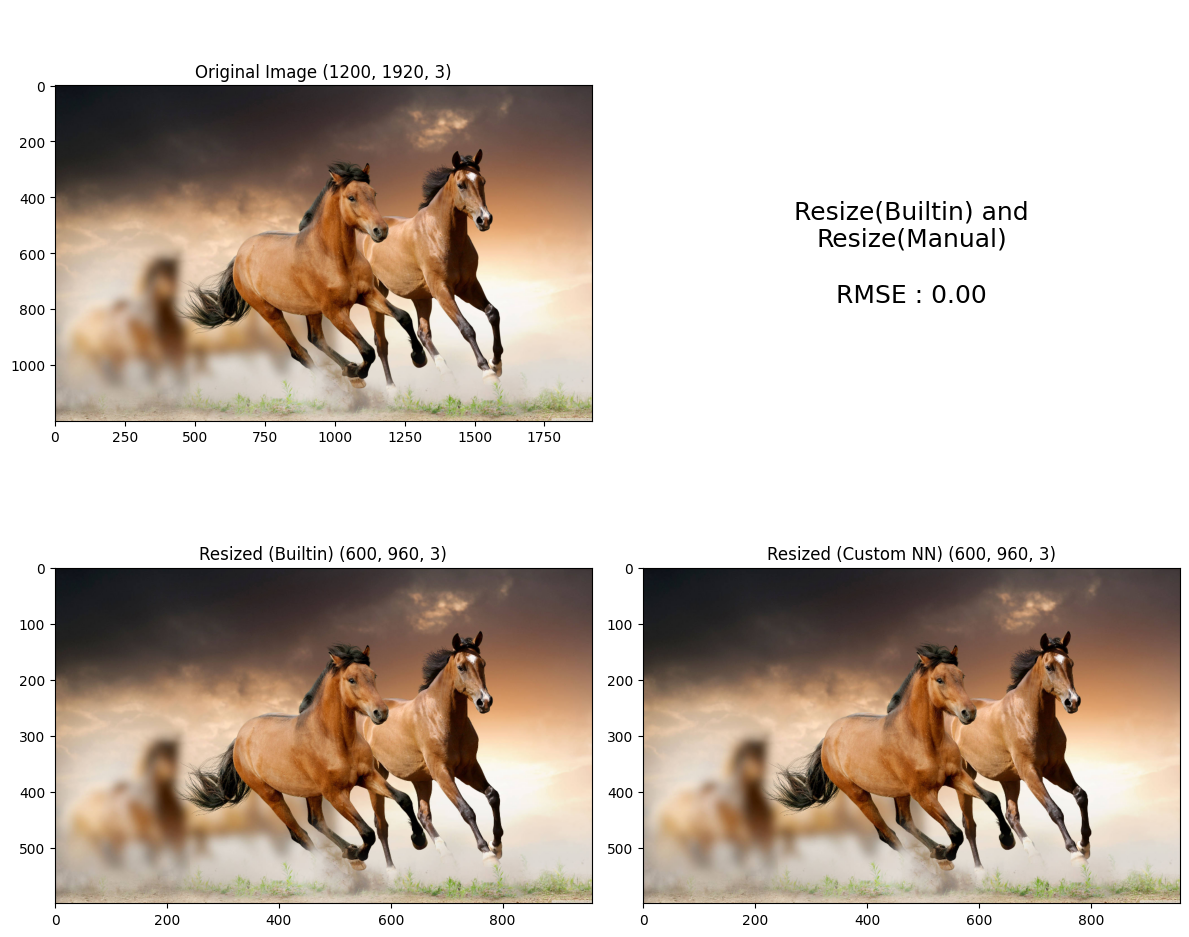

In [7]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

a = str(img.shape)
axes[0][0].imshow(img)
axes[0][0].set_title("Original Image "+a)

b = str(resized_builtin.shape)
axes[1][0].imshow(resized_builtin)
axes[1][0].set_title("Resized (Builtin) "+b)

c = str(resized_manual.shape)
axes[1][1].imshow(resized_manual)
axes[1][1].set_title("Resized (Custom NN) "+c)

axes[0][1].text(0.5, 0.5, f"Resize(Builtin) and\nResize(Manual)\n\nRMSE : {rmse_value1:.2f}", fontsize = 18, ha='center', va = 'center')
axes[0][1].axis("off")

plt.tight_layout()
plt.show()


# Question 2

### Part A

In [8]:
# Resize using inbuilt function (cv2.INTER_LINEAR)

resized_BI_builtin = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)

### Part B

In [9]:
# This function defines vectorized bilinear interpolation.
def bilinear_interp(img, position):
    h, w, channels = img.shape
    x, y = position[:, 0], position[:, 1]
    x0, y0 = np.floor(x).astype(np.int32), np.floor(y).astype(np.int32)
    x1, y1 = x0 + 1, y0 + 1

    # These lines find the coordinates of the four nearest pixels
    x0 = np.clip(x0, 0, w - 1)
    x1 = np.clip(x1, 0, w - 1)
    y0 = np.clip(y0, 0, h - 1)
    y1 = np.clip(y1, 0, h - 1)

    # Compute interpolation weights.
    a = ((x1 - x) * (y1 - y))[:, np.newaxis] * img[y0, x0]  # Top-left pixel value      *    its weight
    b = ((x - x0) * (y1 - y))[:, np.newaxis] * img[y0, x1]  # Top-right pixel value     *    its weight
    c = ((x1 - x) * (y - y0))[:, np.newaxis] * img[y1, x0]  # Bottom-left pixel value   *    its weight
    d = ((x - x0) * (y - y0))[:, np.newaxis] * img[y1, x1]  # Bottom-right pixel value  *    its weight

    # Return the sum, i.e, weighted average.
    return a+b+c+d

def resizeBI(img, new_size):
    src_h, src_w, channels = img.shape
    dst_w, dst_h = new_size

    # Generate target grid
    x_new = np.linspace(0, src_w - 1, dst_w)
    y_new = np.linspace(0, src_h - 1, dst_h)
    x_grid, y_grid = np.meshgrid(x_new, y_new)

    # Flatten and create position array
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

    # Apply bilinear interpolation
    resized_flat = bilinear_interp(img, positions)

    # Reshape back to (dst_h, dst_w, channels)
    return resized_flat.reshape(dst_h, dst_w, channels).astype(np.uint8)

resized_BI_manual = resizeBI(img, new_size)

### Part C

In [10]:
# Calculating the rmse_value using the function already defined in Question 1
rmse_value2 = rmse(resized_BI_builtin, resized_BI_manual)

### Part D 

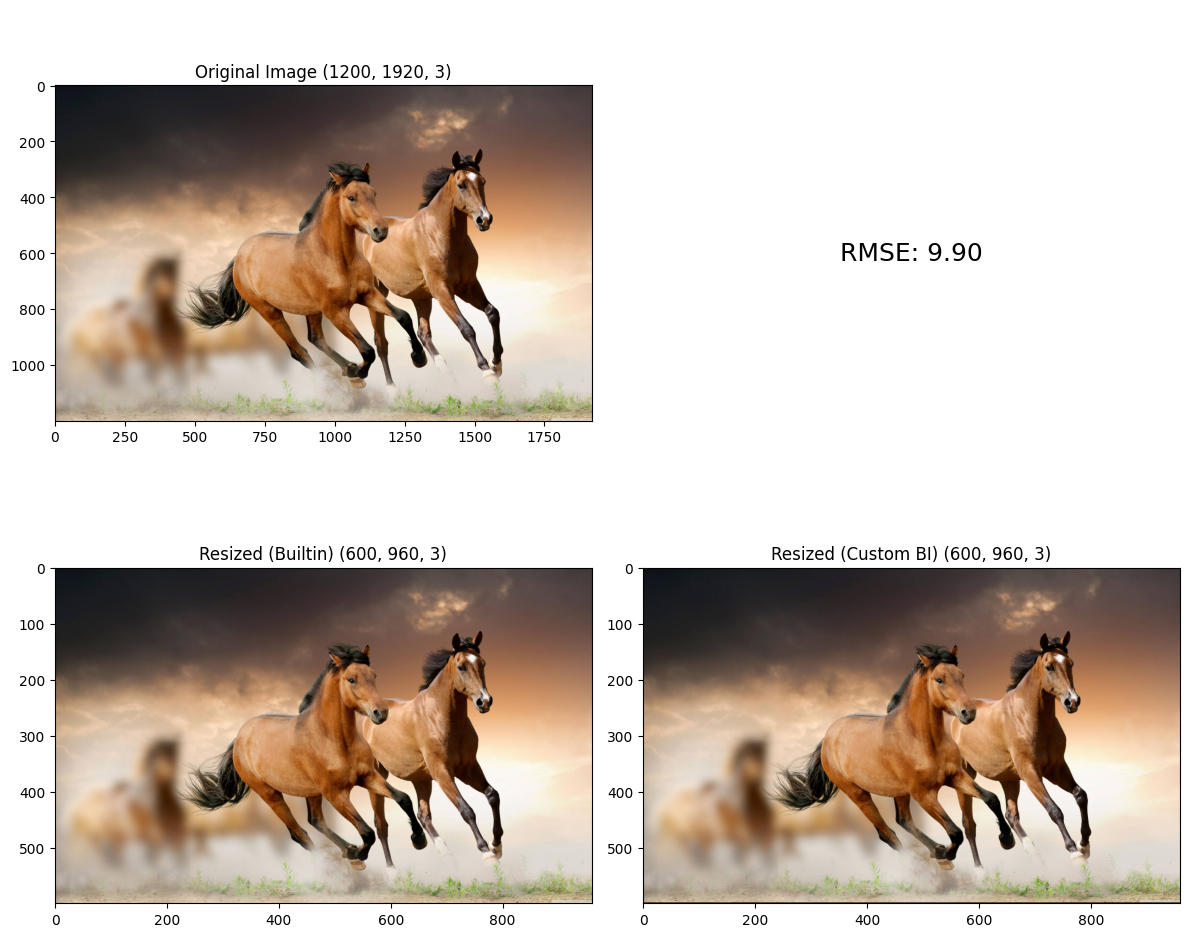

In [11]:
# D. Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

a = str(img.shape)
axes[0][0].imshow(img)
axes[0][0].set_title("Original Image " + a)

b = str(resized_BI_builtin.shape)
axes[1][0].imshow(resized_BI_builtin)
axes[1][0].set_title("Resized (Builtin) " + b)

c = str(resized_BI_manual.shape)
axes[1][1].imshow(resized_BI_manual)
axes[1][1].set_title("Resized (Custom BI) " + c)

axes[0][1].text(0.5, 0.5, f"RMSE: {rmse_value2:.2f}", fontsize = 18, ha='center', va = 'center')
axes[0][1].axis("off")

plt.tight_layout()
plt.show()

# Question 3

### Part A

In [12]:
# Rotation of the image using OpenCV (Built-in)
def rotate_builtin(img, angle):
    h, w = img.shape[:2]
    
    # Here, I have chosen to rotate about center of the image
    center = (w // 2, h // 2) 

    # Getting the rotation matrix and using it for rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

rotated_builtin_15 = rotate_builtin(img, 15)
rotated_builtin_45 = rotate_builtin(img, 45)

### Part B

In [13]:
# This is the function which uses the matrix to apply transformation.
def use_matrix(img, M):
    h, w, c = img.shape  # Get input image dimensions

    # Create a grid of (x, y) coordinates in the output image (same size as input)
    y_out, x_out = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

    # Convert (x, y) into homogeneous coordinates (add 1 for translation)
    ones = np.ones_like(x_out)
    coords_out = np.stack([x_out, y_out, ones], axis=-1).reshape(-1, 3).T  # Shape: (3, w * h)

    # Compute inverse transformation to get corresponding input coordinates
    M_inv = np.linalg.pinv(np.vstack([M, [0, 0, 1]]))[:2]  # Convert to 3x3 and invert
    coords_in = M_inv @ coords_out  # Shape: (2, w * h)

    # Extract x, y input coordinates
    x_in, y_in = coords_in.reshape(2, h, w)

    # Apply bilinear interpolation
    x0, y0 = np.floor(x_in).astype(int), np.floor(y_in).astype(int)
    x1, y1 = x0 + 1, y0 + 1

    # Clip coordinates to image bounds
    x0, x1 = np.clip(x0, 0, w - 1), np.clip(x1, 0, w - 1)
    y0, y1 = np.clip(y0, 0, h - 1), np.clip(y1, 0, h - 1)

    # Compute interpolation weights
    wa = (x1 - x_in) * (y1 - y_in)
    wb = (x_in - x0) * (y1 - y_in)
    wc = (x1 - x_in) * (y_in - y0)
    wd = (x_in - x0) * (y_in - y0)

    # Apply bilinear interpolation for each channel
    result = np.zeros((h, w, c), dtype=img.dtype)
    for i in range(c):
        result[..., i] = (wa * img[y0, x0, i] +
                          wb * img[y0, x1, i] +
                          wc * img[y1, x0, i] +
                          wd * img[y1, x1, i])

    return result

# This function rotates the images manually
def rotate_manual(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    # Getting the angles in radians
    angle_rad = np.radians(angle)

    # Calculating the sinusoidal functions needed to calculate the matrix of rotation
    cos_theta, sin_theta = np.cos(angle_rad), np.sin(angle_rad)
    
    M = np.array([
        [cos_theta, sin_theta, (1 - cos_theta) * center[0] - sin_theta * center[1]],
        [-sin_theta, cos_theta, (1 - cos_theta) * center[1] + sin_theta * center[0]]
    ])

    # Apply affine transformation
    rotated = use_matrix(img, M)
    return rotated

# Applying the custom rotations
rotated_custom_15 = rotate_manual(img, 15)
rotated_custom_45 = rotate_manual(img, 45)

### Part C

In [14]:
# Computing the RMSE for both the images
rmse_15 = rmse(rotated_builtin_15, rotated_custom_15)
rmse_45 = rmse(rotated_builtin_45, rotated_custom_45)

### Part D

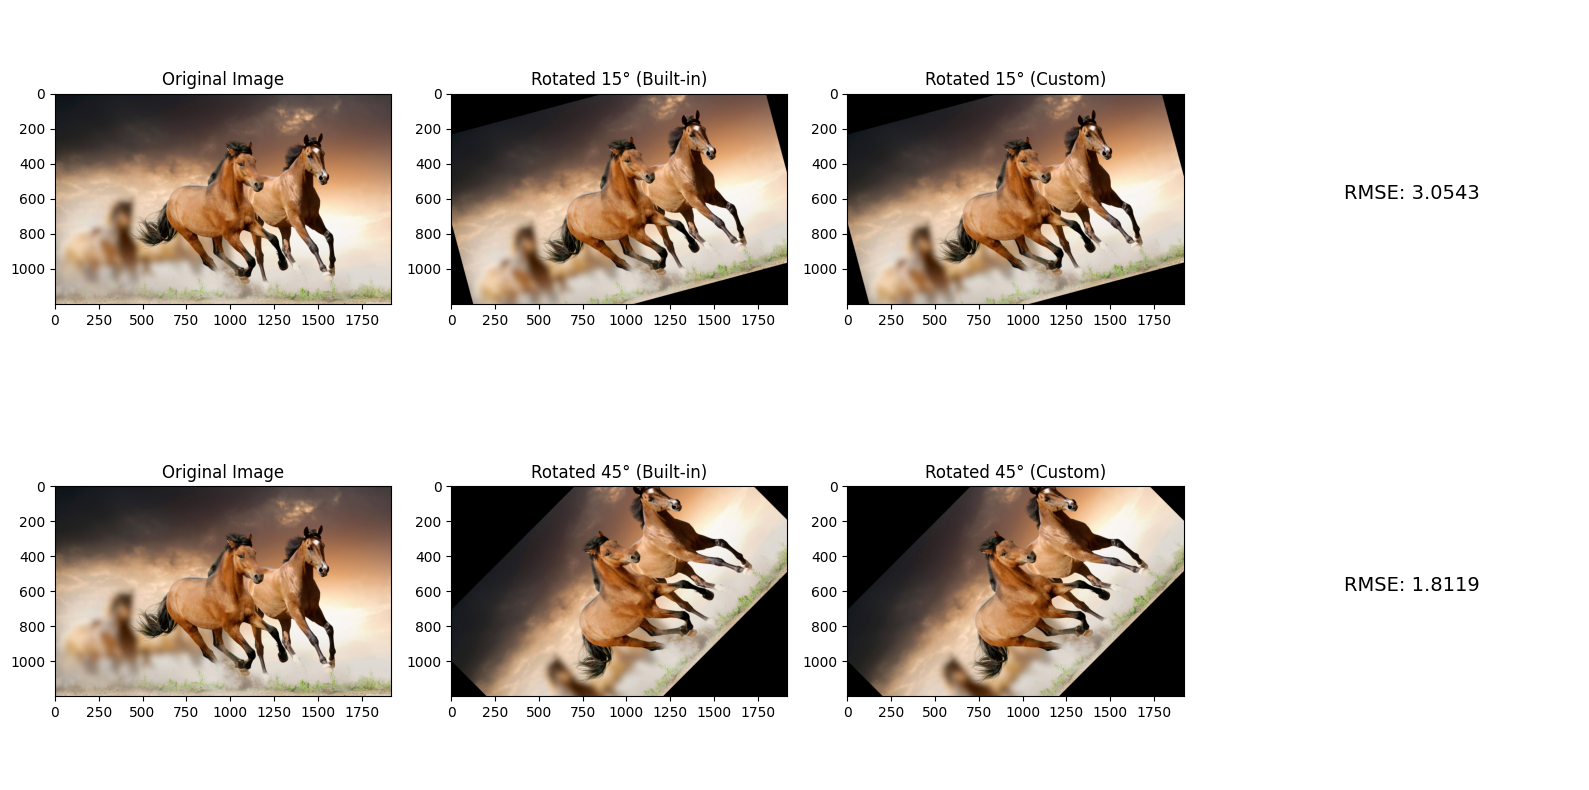

In [15]:
# Plotting the results
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Row 1 : 15° Rotation
axes[0, 0].imshow(img)
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(rotated_builtin_15)
axes[0, 1].set_title("Rotated 15° (Built-in)")

axes[0, 2].imshow(rotated_custom_15)
axes[0, 2].set_title("Rotated 15° (Custom)")

axes[0, 3].text(0.5, 0.5, f"RMSE: {rmse_15:.4f}", fontsize=14, ha='center')
axes[0, 3].axis("off")

# Row 2 : 45° Rotation
axes[1, 0].imshow(img)
axes[1, 0].set_title("Original Image")

axes[1, 1].imshow(rotated_builtin_45)
axes[1, 1].set_title("Rotated 45° (Built-in)")

axes[1, 2].imshow(rotated_custom_45)
axes[1, 2].set_title("Rotated 45° (Custom)")

axes[1, 3].text(0.5, 0.5, f"RMSE: {rmse_45:.4f}", fontsize=14, ha='center')
axes[1, 3].axis("off")

plt.tight_layout()
plt.show()


# Question 4

### Part A

In [16]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Part B

In [17]:
# This is the slicer and with each element in the slicer, we will take and for bit-plance slicing
slicer = [1]
for i in range(7):
    slicer.append(slicer[-1]*2)

# Extracting the bit planes by taking and with each of the value in slicer
bit_planes = [(img_gray & slicer[i]) for i in range(8)]

### Part C

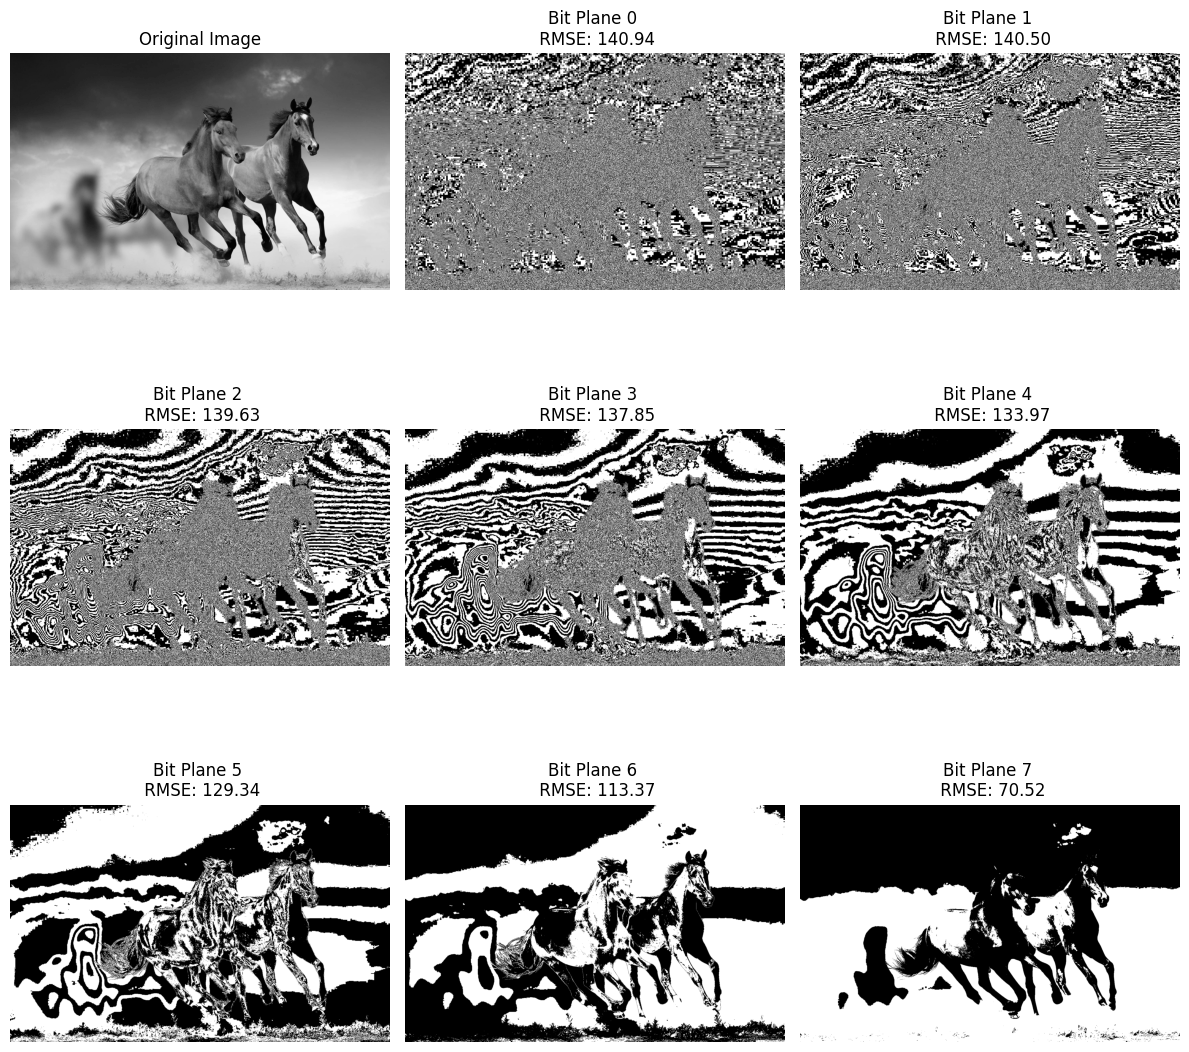

In [18]:
# Compute RMSEs for each bit plane
rmse_values = [rmse(img_gray, plane) for plane in bit_planes]

# Plot original + 8 bit-plane images (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Show original image
axes[0].imshow(img_gray, cmap = "gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

# Show 8 bit-planes
for i in range(8):
    axes[i + 1].imshow(bit_planes[i], cmap="gray")
    axes[i + 1].set_title(f"Bit Plane {i} \n RMSE: {rmse_values[i]:.2f}")
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()

# Question 5

### Part A

In [19]:
image = cv2.imread("butterfly.jpg", cv2.IMREAD_GRAYSCALE)
img_histeq_builtin = cv2.equalizeHist(image)

### Part B

In [20]:
# Manual histogram equalization

def histeq_manual(img):
    # Compute histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])  
    
    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()  

    # Normalize CDF to [0,255]
    cdf_normalized = cdf * 255 / cdf[-1]

    # Apply CDF mapping
    equalized_img = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape)

    return equalized_img.astype(np.uint8)

img_histeq_manual = histeq_manual(image)

### Part C

In [21]:
# Computing the rmse values
rmse_value_builtin_org = rmse(image, img_histeq_builtin)
rmse_value_manual_org = rmse(image, img_histeq_manual)
rmse_value_builtin_manual = rmse(img_histeq_builtin, img_histeq_manual)

### Part D

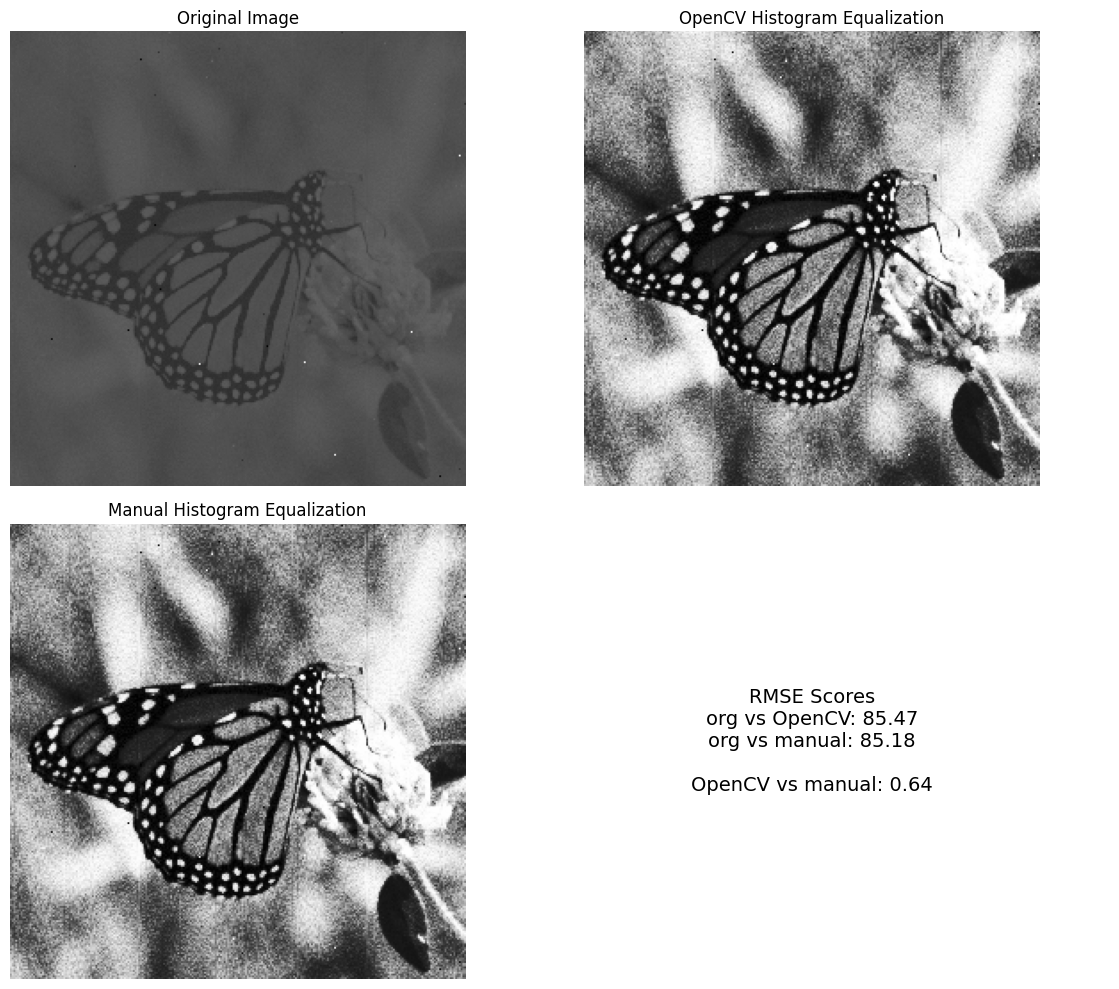

In [22]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# OpenCV Histogram Equalized image
axes[0, 1].imshow(img_histeq_builtin, cmap="gray")
axes[0, 1].set_title("OpenCV Histogram Equalization")
axes[0, 1].axis("off")

# Manual Histogram Equalized image
axes[1, 0].imshow(img_histeq_manual, cmap="gray")
axes[1, 0].set_title("Manual Histogram Equalization")
axes[1, 0].axis("off")

# RMSE Score Display
axes[1, 1].text(0.5, 0.5, f"RMSE Scores\norg vs OpenCV: {rmse_value_builtin_org:.2f}\norg vs manual: {rmse_value_manual_org:.2f}\n\nOpenCV vs manual: {rmse_value_builtin_manual:.2f}\n",fontsize=14, ha='center', va='center')
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


# Question 6

### Part A

In [23]:
# Adavptive histogram equalization using OpenCV
# This image is Contrast Limited Histogram Equalized

image6 = cv2.imread("butterfly.jpg", cv2.IMREAD_GRAYSCALE)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit = 8, tileGridSize=(16,16))

# Apply CLAHE to an image (must be grayscale)
ahe_builtin = clahe.apply(image6)

### Part B

In [24]:
def adaptive_histeq_manual(image, tile_size = 128):
    out = np.zeros(image.shape, dtype = np.uint8)

    # No of tiles in x and y direction.
    # Done by ceiling division with the tile_size.

    tiles_nox = (image.shape[0]//tile_size)
    if tiles_nox * tile_size != image.shape[0]: tiles_nox += 1
    tiles_noy = (image.shape[1]//tile_size)
    if tiles_noy * tile_size != image.shape[1]: tiles_noy += 1

    for i in range(tiles_nox):
        for j in range(tiles_noy):

            # Creating a temp tile for equalization, identical to the image tile.
            temp = np.zeros((tile_size,tile_size), dtype = np.uint8)
            x_start, y_start = i*tile_size , j*tile_size 
            x_end, y_end = min((i+1)*tile_size,image.shape[0]) - 1, min((j+1)*tile_size,image.shape[1]) - 1
            for tempi in range(x_end - x_start + 1):
                for tempj in range(y_end - y_start + 1):
                    temp[tempi][tempj] = image[x_start + tempi][y_start + tempj]

            # Equalizing the temp
            temp = cv2.equalizeHist(temp)

            # Overwriting the temp in out
            for tempi in range(x_end - x_start + 1):
                for tempj in range(y_end - y_start + 1):
                    out[x_start + tempi][y_start + tempj] = temp[tempi][tempj]
    return out

# Apply AHE manually
ahe_manual = adaptive_histeq_manual(image6, tile_size = 64)

### Part C

In [25]:
# Computing the rmse values
rmse_ahe_value_builtin_org = rmse(image6, ahe_builtin)
rmse_ahe_value_manual_org = rmse(image6, ahe_manual)
rmse_ahe_value_builtin_manual = rmse(ahe_builtin, ahe_manual)

### Part D

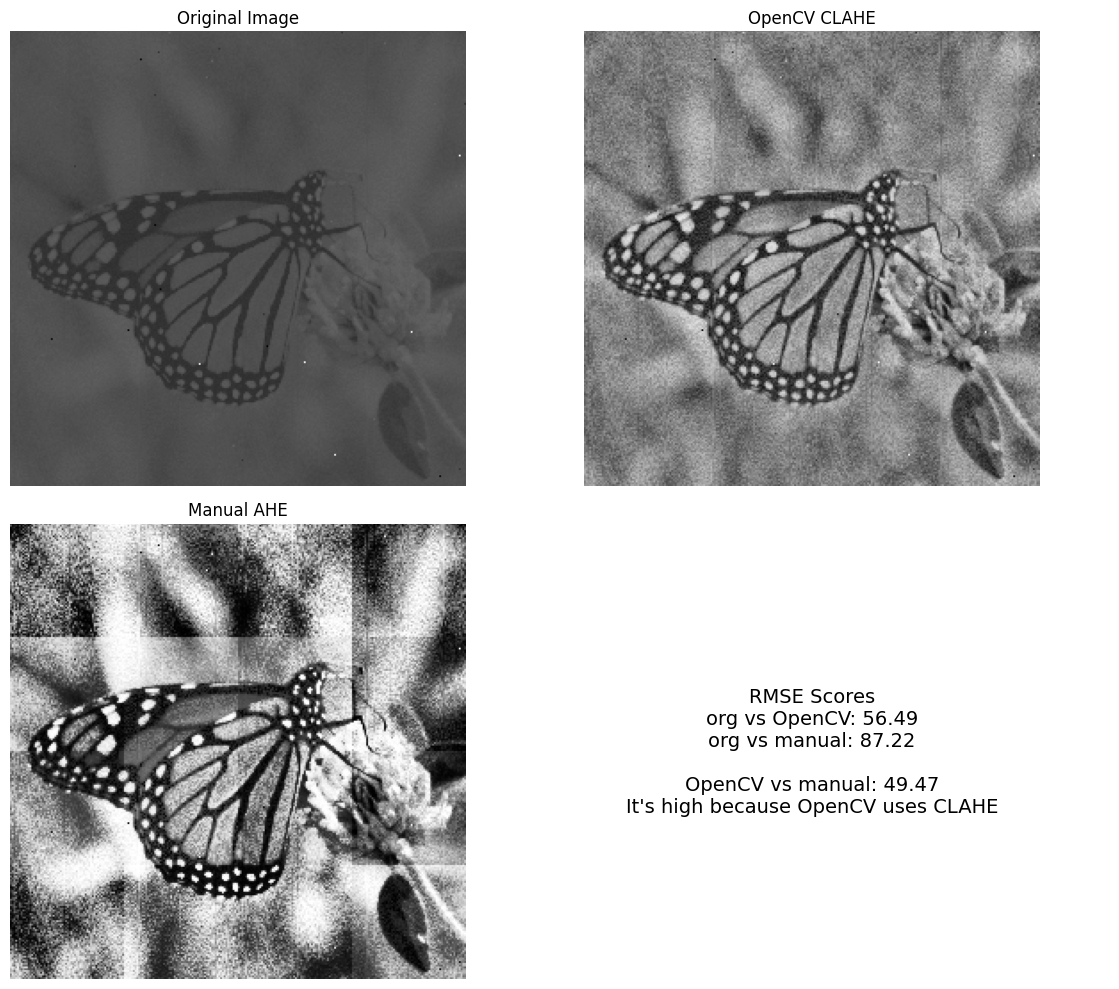

In [26]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(image6, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# OpenCV CLAHE image
axes[0, 1].imshow(ahe_builtin, cmap="gray")
axes[0, 1].set_title("OpenCV CLAHE")
axes[0, 1].axis("off")

# Manual Adaptive Histogram Equalized image
axes[1, 0].imshow(ahe_manual, cmap="gray")
axes[1, 0].set_title("Manual AHE")
axes[1, 0].axis("off")

# RMSE Score Display
axes[1, 1].text(0.5, 0.5, f"RMSE Scores\norg vs OpenCV: {rmse_ahe_value_builtin_org:.2f}\norg vs manual: {rmse_ahe_value_manual_org:.2f}\n\nOpenCV vs manual: {rmse_ahe_value_builtin_manual:.2f}\nIt's high because OpenCV uses CLAHE",fontsize=14, ha='center', va='center')
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


# Question 7

### Part A

In [40]:
from skimage import exposure

histogram = cv2.imread("histogram.jpg", cv2.IMREAD_GRAYSCALE)
reference0 = cv2.imread("reference.jpg")
reference = cv2.cvtColor(reference0, cv2.COLOR_BGR2GRAY)

multi = True if reference.shape[-1] > 1 else False
matched_builtin = exposure.match_histograms(histogram, reference, channel_axis=-1 if len(reference.shape) == 3 else None)

### Part B

In [41]:
# Function to manually perform histogram matching
def histmatch_manual(source, reference):
    # Step 1: Compute histograms
    hist_src, _ = np.histogram(source.flatten(), bins=256, range=(0, 256))
    hist_ref, _ = np.histogram(reference.flatten(), bins=256, range=(0, 256))

    # Step 2: Compute CDFs
    cdf_src = np.cumsum(hist_src).astype(np.float32)
    cdf_ref = np.cumsum(hist_ref).astype(np.float32)

    # Normalize CDFs (Convert to range 0-255)
    cdf_src = (cdf_src - cdf_src.min()) / (cdf_src.max() - cdf_src.min()) * 255
    cdf_ref = (cdf_ref - cdf_ref.min()) / (cdf_ref.max() - cdf_ref.min()) * 255

    # Step 3: Create Mapping Function
    lookup_table = np.zeros(256, dtype=np.uint8)
    ref_values = np.arange(256)

    for i in range(256):
        # Find closest match in reference CDF
        lookup_table[i] = np.argmin(np.abs(cdf_ref - cdf_src[i]))

    # Step 4: Apply Mapping to Source Image
    matched_img = lookup_table[source]

    return matched_img

matched_manual =  histmatch_manual(histogram,reference)

### Part C

In [42]:
# Computing the rmse values
rmse_h_sci = rmse(histogram, matched_builtin)
rmse_h_man = rmse(histogram, matched_manual)
rmse_sci_man = rmse(matched_builtin, matched_manual)

### Part D

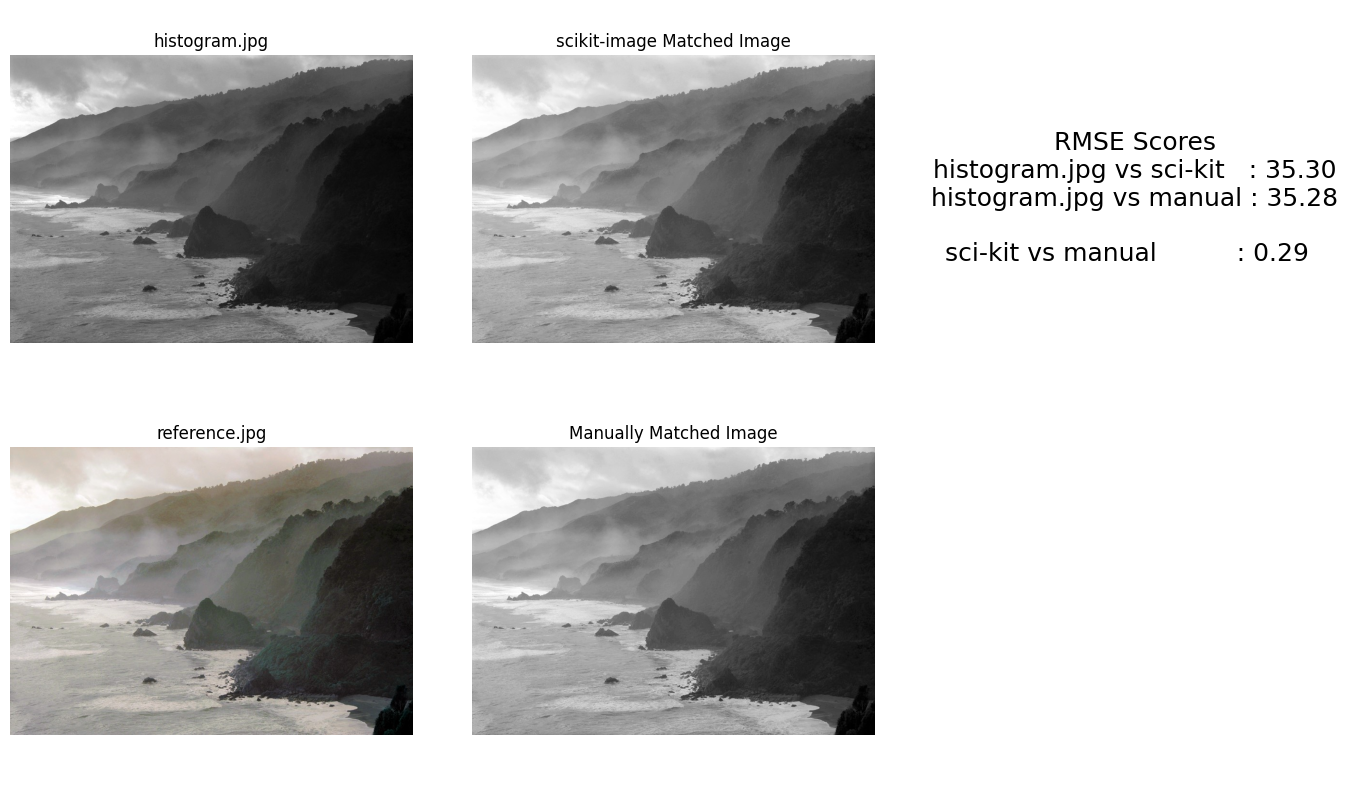

In [43]:
# Plot results
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# histogram.jpg
axes[0, 0].imshow(histogram, cmap="gray")
axes[0, 0].set_title("histogram.jpg")
axes[0, 0].axis("off")

# scikit-image matched image.
axes[0, 1].imshow(matched_builtin, cmap="gray")
axes[0, 1].set_title("scikit-image Matched Image")
axes[0, 1].axis("off")

# Manually Matched Image
axes[1, 1].imshow(matched_manual, cmap="gray")
axes[1, 1].set_title("Manually Matched Image")
axes[1, 1].axis("off")

# reference.jpg
axes[1, 0].imshow(reference0, cmap="gray")
axes[1, 0].set_title("reference.jpg")
axes[1, 0].axis("off")

# RMSE Score Display (Corrected)
axes[0, 2].text(0.5, 0.5, f"RMSE Scores\nhistogram.jpg vs sci-kit   : {rmse_h_sci:.2f}\nhistogram.jpg vs manual : {rmse_h_man:.2f}\n\nsci-kit vs manual          : {rmse_sci_man:.2f}  ",fontsize = 18, ha='center', va='center')
axes[0, 2].set_title("")
axes[0, 2].axis("off")

# To ignore the last part of the image
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

# Question 8

### Part A

In [ ]:
img = cv2.imread("horse.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

src_pts = np.float32([[0, 0], [1919, 1200], [0, 1199]])
dst_pts = np.float32([[1919, 250], [0, 900], [1919, 1199]])

affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)
transformed_builtin = cv2.warpAffine(img, affine_matrix, (img.shape[1], img.shape[0]))

### Part B

In [45]:
# Compute the Affine Transformation matrix manually.

# flag will be false if the matrix B is not invertible, i.e., image can't be transformed linearly about any point.
# This case is when all points in B are in same line.
flag = True

def find_inverse_matrix(tie_src, tie_dst):

    # Calling the global variable in the function
    global flag

    # Initializing the matrices with points as basis
    A,B,out = np.ones((3,3)), np.ones((3,3)), np.ones((3,3))
    for i in range(3):
        for j in range(2):
            A[j][i], B[j][i] = tie_src[i][j], tie_dst[i][j]

    # Changing the flag to false if B can't be inverted
    try:
        # Try inverting the matrix,
        B_inv = np.linalg.inv(B)
    except:
        # otherwise return for false flag
        flag = False
        return
    
    return A @ B_inv

def find_transformed_image(img, tie_src, tie_dst):
    out = np.zeros_like(img)
    if not flag: return out

    # Importing the matrix
    T = find_inverse_matrix(tie_src, tie_dst)

    # Checking the shape of the image
    x,y,_ = img.shape
    
    # For each point in destination image,
    for i in range(x):
        for j in range(y):
            # inverse map the point to the source image
            v = np.array([[j],[i],[1]])
            v_ = T @ v

            # And add it's nearest neighbour at location of v
            # Exceptional handling is done in case point is out of the image
            if int(v_[1][0]) < x and int(v_[1][0]) >= 0:
                if int(v_[0][0]) < y and int(v_[0][0]) >= 0:
                    out[i][j] = img[int(v_[1][0])][int(v_[0][0])]
    return out

# This is the manually transformed image
transformed_manual = find_transformed_image(img, src_pts, dst_pts)

### Part C

In [46]:
# Calculating the rmse value
rmse_value8 = rmse(transformed_builtin, transformed_manual)

### Part D

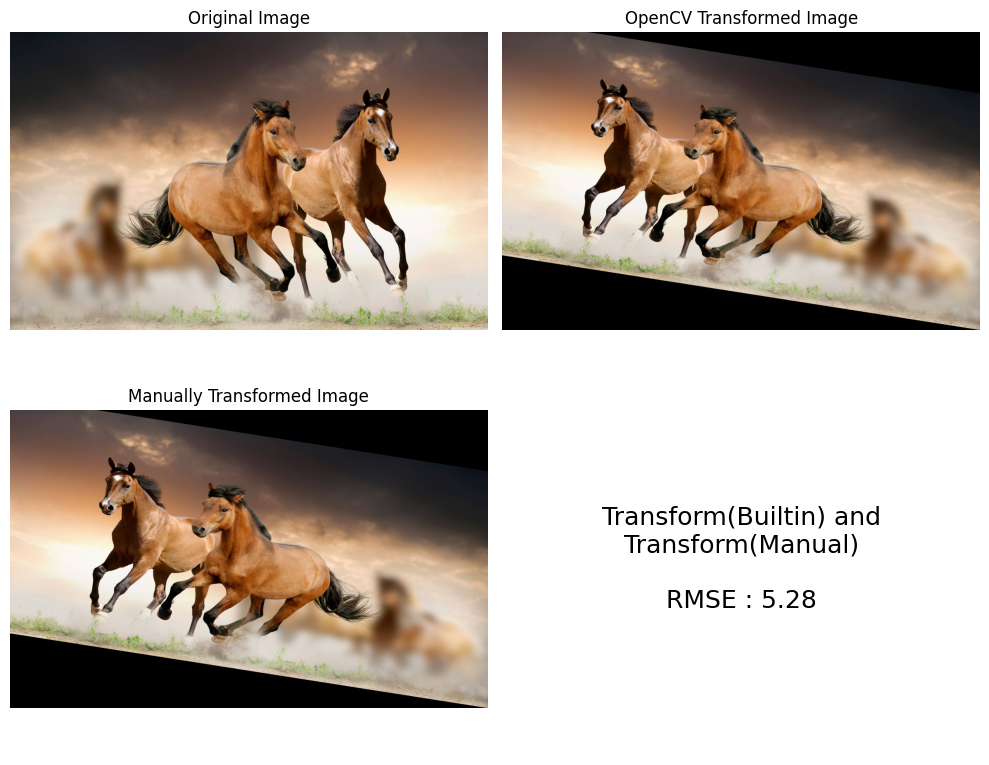

In [50]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original image
axes[0, 0].imshow(img, cmap = "gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# OpenCV Transformed Image
axes[0, 1].imshow(transformed_builtin, cmap="gray")
axes[0, 1].set_title("OpenCV Transformed Image")
axes[0, 1].axis("off")

# Manually Transformed Image
axes[1, 0].imshow(transformed_manual, cmap="gray")
axes[1, 0].set_title("Manually Transformed Image")
axes[1, 0].axis("off")

# RMSE Score Display
axes[1, 1].text(0.5, 0.5, f"Transform(Builtin) and\nTransform(Manual)\n\nRMSE : {rmse_value8:.2f}", fontsize = 18, ha='center', va = 'center')
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()
